# Draft 3

Take only top 20 stocks and put full OHLCV data with the sentiment score to take advantage of more data points.


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import yfinance as yf
import openai
from os import getenv
from dotenv import load_dotenv
import openai
import time
import seaborn as sns
from scipy.stats import norm


# top 20 symbols

In [15]:
symbols_top20 = pd.read_csv('symbols/symbols_top_20.csv')

In [24]:
symbols_top20.loc[symbols_top20['Symbol'] == 'AAPL']

,Symbol,Dollar_Symbol,Name
0,AAPL,$AAPL,Apple Inc. Common Stock


In [21]:
symbols_top20.head(20)

,Symbol,Dollar_Symbol,Name
0,AAPL,$AAPL,Apple Inc. Common Stock
1,AMC,$AMC,AMC Entertainment Holdings Inc. Class A Common...
2,AMD,$AMD,Advanced Micro Devices Inc. Common Stock
3,CVNA,$CVNA,Carvana Co. Class A Common Stock
4,DISH,$DISH,DISH Network Corporation Class A Common Stock
5,HOOD,$HOOD,Robinhood Markets Inc. Class A Common Stock
6,MSFT,$MSFT,Microsoft Corporation Common Stock
7,NVDA,$NVDA,NVIDIA Corporation Common Stock
8,PYPL,$PYPL,PayPal Holdings Inc. Common Stock
9,RIVN,$RIVN,Rivian Automotive Inc. Class A Common Stock


# get the df

In [18]:
hot_df = pd.read_csv('text_df/hot_df.csv')
print(f"Hot length: {len(hot_df)}")
new_df = pd.read_csv('text_df/new_df.csv')
print(f"New length: {len(new_df)}")

Hot length: 3164
New length: 3327


In [30]:
new_df['text'][0]

'What Are Your Moves Tomorrow, March 16, 2023'

# get ticker

In [52]:
def symbol_matches(sentence, symbol_list):
    matches = []
    for symbol in symbol_list:
        pattern = r"\b" + re.escape(str(symbol)) + r"\b"
        if re.search(pattern, sentence):
            matches.append(symbol)
    return matches

def find_matches(hot_df, symbols):
    # List to store the results
    results = []

    # Iterate through each row in the DataFrame
    for index, row in hot_df.iterrows():
        date = row['date']
        sentence = str(row['text'])

        # Find matches for each sentence with "Symbol" and "Dollar_Symbol" columns
        matches_symbols = symbol_matches(sentence, symbols['Symbol'].tolist())
        matches_dollar_symbols = symbol_matches(sentence, symbols['Dollar_Symbol'].tolist())
        all_matches = matches_symbols + matches_dollar_symbols

        #if more than one match, revert to 'S&P'
        if len(all_matches) > 1:
            all_matches = ['S&P']
        # If all_matches is empty then input 'S&P'
        elif not all_matches:
            all_matches = ['S&P']



        ticker_string = ', '.join(all_matches)

        # Append the results to the list
        results.append((date, sentence, ticker_string))

    # Create a new DataFrame to store the results
    tickers = pd.DataFrame(results, columns=["date", "text", "ticker"])

    # Print the result DataFrame
    print(tickers)

    # Return the result DataFrame  
    return tickers


In [73]:
hot_ticker_top13 = find_matches(hot_df,symbols_top20)

            date                                               text ticker
0     2023-03-16       What Are Your Moves Tomorrow, March 16, 2023    S&P
1     2023-03-16  Most Anticipated Earnings Releases for the wee...    S&P
2     2023-03-16          Eggon says “GME go up” after earnings. ⬆️    S&P
3     2023-03-16  Goldman Sachs: 99% of borrowers have a mortgag...    S&P
4     2023-03-16                            Who would have thought?    S&P
...          ...                                                ...    ...
3159  2023-08-04                       When the IRS comes after you    S&P
3160  2023-08-04  How do people lose their entire account on opt...    S&P
3161  2023-08-04                  Better Option Strategies, Advice?    S&P
3162  2023-08-04                                 Whats up with $TGT    S&P
3163  2023-08-04  You do NOT have to buy the shares when exercis...    S&P

[3164 rows x 3 columns]


In [74]:
new_ticker_top13 = find_matches(new_df,symbols_top20)

            date                                               text ticker
0     2023-03-16  Wrinkle-brain Plays (Mathematically derived op...    S&P
1     2023-03-16     SONY Stock Forecast, Price & News (Sony Group)    S&P
2     2023-03-16                    Credit Suisse = Lehman Brothers    S&P
3     2023-03-16  Credit Suisse to borrow up to about $54 billio...    S&P
4     2023-03-16     "you met me at a very strange time in my life"    S&P
...          ...                                                ...    ...
3322  2023-08-04                         Why did you start trading?    S&P
3323  2023-08-04  MCRB - possibly groundbreaking microbiome trea...    S&P
3324  2023-08-04           Learned what early assignment is today 🥲    S&P
3325  2023-08-04     $250K YOLO on Allogene $ALLO High SI right now    S&P
3326  2023-08-04                  Better Option Strategies, Advice?    S&P

[3327 rows x 3 columns]


In [75]:
#write hot_ticker_top20 to csv file
hot_ticker_top13.to_csv('text_df/hot_ticker_top13.csv')
# write new_ticker_top20 
new_ticker_top13.to_csv('text_df/new_ticker_top13.csv')

In [76]:
hot_ticker_top13 = pd.read_csv('text_df/hot_ticker_top13.csv')
print(f"Hot length: {len(hot_ticker_top13)}")
new_ticker_top13 = pd.read_csv('text_df/new_ticker_top13.csv')
print(f"New length: {len(new_ticker_top13)}")

Hot length: 3164
New length: 3327


In [116]:
hot_ticker_top13['text'] = hot_ticker_top13['text'].str.lower()
new_ticker_top13['text'] = new_ticker_top13['text'].str.lower()
hot_ticker_top13.head()

,Unnamed: 0,date,text,ticker
0,0,2023-03-16,"what are your moves tomorrow, march 16, 2023",S&P
1,1,2023-03-16,most anticipated earnings releases for the wee...,S&P
2,2,2023-03-16,eggon says “gme go up” after earnings. ⬆️,S&P
3,3,2023-03-16,goldman sachs: 99% of borrowers have a mortgag...,S&P
4,4,2023-03-16,who would have thought?,S&P


# get the tickers in a list


In [59]:
def price_tickers(ticker_df):
    # Count the occurrences of each ticker and sort them in descending order
    ticker_counts_df = ticker_df['ticker'].value_counts().sort_values(ascending=False).reset_index()

    # Reset the index and rename the columns for clarity
    ticker_counts_df.columns = ['Ticker', 'Count']
    # Filter the tickers that occur more than three times
    frequent_tickers_df = ticker_counts_df[ticker_counts_df['Count'] >= 10]
    print(frequent_tickers_df)
    # Convert the filtered tickers to a list
    frequent_tickers_list = frequent_tickers_df['Ticker'].tolist()

    # Return the list of frequent tickers
    return frequent_tickers_list

In [96]:
def ticker_list(df):
    ticker_list = list(set(df['ticker'].tolist()))
    print(ticker_list)
    return ticker_list

In [98]:
new_ticker_list = ticker_list(new_ticker_top20)


['UBS', 'NVDA', 'AMD', 'AMC', 'CVNA', 'AAPL', 'HOOD', 'TSLA', 'RTX', 'PYPL', 'DISH', 'MSFT', 'S&P', 'RIVN']


In [99]:
hot_ticker_list = ticker_list(hot_ticker_top20)

['UBS', 'NVDA', 'AMD', 'AMC', 'CVNA', 'AAPL', 'HOOD', 'TSLA', 'RTX', 'PYPL', 'DISH', 'MSFT', 'S&P', 'RIVN']


In [100]:
def download_stock_data(ticker):
    start_date = pd.to_datetime('2022-08-02')
    end_date = pd.to_datetime('2023-08-17')
    #download the stock
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

def download_ticker(ticker_list):
    for ticker in ticker_list:
        print(ticker)
        # Call the download_stock_data function to get adjusted closing prices
        stock_data = download_stock_data(ticker)
        #write the stock data to a csv file in the price_data folder
        stock_data.to_csv('price_data/top_13/'+ticker+'.csv')

In [101]:
download_ticker(hot_ticker_list)

UBS
[*********************100%***********************]  1 of 1 completed
NVDA
[*********************100%***********************]  1 of 1 completed
AMD
[*********************100%***********************]  1 of 1 completed
AMC
[*********************100%***********************]  1 of 1 completed
CVNA
[*********************100%***********************]  1 of 1 completed
AAPL
[*********************100%***********************]  1 of 1 completed
HOOD
[*********************100%***********************]  1 of 1 completed
TSLA
[*********************100%***********************]  1 of 1 completed
RTX
[*********************100%***********************]  1 of 1 completed
PYPL
[*********************100%***********************]  1 of 1 completed
DISH
[*********************100%***********************]  1 of 1 completed
MSFT
[*********************100%***********************]  1 of 1 completed
S&P
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['S&P']: Exception('%ticker%: No timezone found, symbol may be delisted')



RIVN
[*********************100%***********************]  1 of 1 completed


In [102]:
download_ticker(new_ticker_list)

UBS
[*********************100%***********************]  1 of 1 completed
NVDA
[*********************100%***********************]  1 of 1 completed
AMD
[*********************100%***********************]  1 of 1 completed
AMC
[*********************100%***********************]  1 of 1 completed
CVNA
[*********************100%***********************]  1 of 1 completed
AAPL
[*********************100%***********************]  1 of 1 completed
HOOD
[*********************100%***********************]  1 of 1 completed
TSLA
[*********************100%***********************]  1 of 1 completed
RTX
[*********************100%***********************]  1 of 1 completed
PYPL
[*********************100%***********************]  1 of 1 completed
DISH
[*********************100%***********************]  1 of 1 completed
MSFT
[*********************100%***********************]  1 of 1 completed
S&P
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['S&P']: Exception('%ticker%: No timezone found, symbol may be delisted')



RIVN
[*********************100%***********************]  1 of 1 completed


In [110]:
#test S&P 500 since the symbol in yf is unique
sp = download_stock_data("^GSPC")
sp.head()
#write it to a csv file
sp.to_csv('price_data/top_13/S&P.csv')

[*********************100%***********************]  1 of 1 completed


In [107]:
def read_price_data_top13(ticker_list):
    data_dict = {}
    for ticker in ticker_list:
        file_path = os.path.join('price_data','top_13' ,f'{ticker}.csv')
        if os.path.exists(file_path):
            data_dict[ticker] = pd.read_csv(file_path)
        else:
            print(f"File for {ticker} does not exist!")
    
    return data_dict

In [154]:
price_data_top13 = read_price_data_top13(hot_ticker_list)


In [155]:
price_data_top13['S&P'].head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-02,4104.209961,4140.470215,4079.810059,4091.189941,4091.189941,4727710000
1,2022-08-03,4107.959961,4167.660156,4107.959961,4155.169922,4155.169922,4351760000
2,2022-08-04,4154.850098,4161.290039,4135.419922,4151.939941,4151.939941,4283320000
3,2022-08-05,4115.870117,4151.580078,4107.310059,4145.189941,4145.189941,4085940000
4,2022-08-08,4155.930176,4186.620117,4128.970215,4140.060059,4140.060059,4221090000


# returns  calculated

In [103]:
def calculate_weekly_returns(price_data):
    for ticker, df in price_data.items():
        close_prices = df['Close']
        for days in range(1, 6):
            df[f'Returns_{days}'] = close_prices.pct_change(periods=days)
        price_data[ticker] = df
    return price_data

In [156]:
price_data_top_13 = calculate_weekly_returns(price_data_top13)
price_data_top_13['S&P'].head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Returns_1,Returns_2,Returns_3,Returns_4,Returns_5
0,2022-08-02,4104.209961,4140.470215,4079.810059,4091.189941,4091.189941,4727710000,NaN,NaN,NaN,NaN,NaN
1,2022-08-03,4107.959961,4167.660156,4107.959961,4155.169922,4155.169922,4351760000,0.015638,NaN,NaN,NaN,NaN
2,2022-08-04,4154.850098,4161.290039,4135.419922,4151.939941,4151.939941,4283320000,-0.000777,0.014849,NaN,NaN,NaN
3,2022-08-05,4115.870117,4151.580078,4107.310059,4145.189941,4145.189941,4085940000,-0.001626,-0.002402,0.013199,NaN,NaN
4,2022-08-08,4155.930176,4186.620117,4128.970215,4140.060059,4140.060059,4221090000,-0.001238,-0.002861,-0.003636,0.011945,NaN
5,2022-08-09,4133.109863,4137.299805,4112.089844,4122.470215,4122.470215,3913090000,-0.004249,-0.005481,-0.007098,-0.007870,0.007646
6,2022-08-10,4181.020020,4211.029785,4177.259766,4210.240234,4210.240234,4546010000,0.021291,0.016951,0.015693,0.014042,0.013253
7,2022-08-11,4227.399902,4257.910156,4201.410156,4207.270020,4207.270020,4630200000,-0.000705,0.020570,0.016234,0.014976,0.013326
8,2022-08-12,4225.020020,4280.470215,4219.779785,4280.149902,4280.149902,3788010000,0.017322,0.016605,0.038249,0.033838,0.032558
9,2022-08-15,4269.370117,4301.790039,4256.899902,4297.140137,4297.140137,3696830000,0.003970,0.021361,0.020640,0.042370,0.037941


# add to sentiment score

In [165]:
# read the sentiment files
hot_finbert = pd.read_csv('sentiment_scores/hot_finbert.csv')
hot_vader = pd.read_csv('sentiment_scores/hot_vader.csv')
hot_chatgpt = pd.read_csv('sentiment_scores/hot_chatgpt.csv')
hot_roberta = pd.read_csv('sentiment_scores/hot_roberta.csv')
new_finbert = pd.read_csv('sentiment_scores/new_finbert.csv')
new_vader = pd.read_csv('sentiment_scores/new_vader.csv')
new_chatgpt = pd.read_csv('sentiment_scores/new_chatgpt.csv')
new_roberta = pd.read_csv('sentiment_scores/new_roberta.csv')

In [151]:
def merge_dataframes(sentiment_df, price_data_dict):
    # List to store the merged rows
    merged_rows = []

    # Iterate through the rows in sentiment_df
    for index, row in sentiment_df.iterrows():
        date = row['date']
        text = row['text']
        ticker = row['ticker']

        # Check if the ticker exists in price_data_ret
        if ticker in price_data_dict:
            ticker_df = price_data_dict[ticker]
        else:
            # If ticker not found, use the 'S&P' DataFrame
            ticker_df = price_data_dict['S&P']
            ticker = 'S&P'
        
        matching_date = ticker_df[ticker_df['Date'] == date]

        

        # If a matching date is found, merge the entire row
        if not matching_date.empty:
            op = matching_date['Open'].iloc[0]
            hi = matching_date['High'].iloc[0]
            lo = matching_date['Low'].iloc[0]
            cl = matching_date['Close'].iloc[0]
            vol = matching_date['Volume'].iloc[0]
            ret_1 = matching_date['Returns_1'].iloc[0]
            ret_2 = matching_date['Returns_2'].iloc[0]
            ret_3 = matching_date['Returns_3'].iloc[0]
            ret_4 = matching_date['Returns_4'].iloc[0]
            ret_5 = matching_date['Returns_5'].iloc[0]

            merged_rows.append([date, text, ticker, op, hi, lo, cl, vol, ret_1, ret_2, ret_3, ret_4, ret_5])


    # Concatenate all the merged rows to create the merged DataFrame
    merged_df = pd.DataFrame(merged_rows, columns=['date','text','ticker','open','high','low','close','vol','ret_1','ret_2','ret_3','ret_4','ret_5'])

    return merged_df


In [161]:
hot_finbert_top_13 = merge_dataframes(hot_finbert,price_data_top_13)

In [158]:
hot_finbert_top_13.head()

,date,text,ticker,open,high,low,close,vol,ret_1,ret_2,ret_3,ret_4,ret_5
0,2023-03-16,"What Are Your Moves Tomorrow, March 16, 2023",S&P,3878.929932,3964.459961,3864.110107,3960.280029,5695790000,0.017562,0.010459,0.027108,0.025557,0.010709
1,2023-03-16,Most Anticipated Earnings Releases for the wee...,S&P,3878.929932,3964.459961,3864.110107,3960.280029,5695790000,0.017562,0.010459,0.027108,0.025557,0.010709
2,2023-03-16,Eggon says “GME go up” after earnings. ⬆️,S&P,3878.929932,3964.459961,3864.110107,3960.280029,5695790000,0.017562,0.010459,0.027108,0.025557,0.010709
3,2023-03-16,Goldman Sachs: 99% of borrowers have a mortgag...,S&P,3878.929932,3964.459961,3864.110107,3960.280029,5695790000,0.017562,0.010459,0.027108,0.025557,0.010709
4,2023-03-16,Who would have thought?,S&P,3878.929932,3964.459961,3864.110107,3960.280029,5695790000,0.017562,0.010459,0.027108,0.025557,0.010709


In [163]:
new_finbert_top_13 = merge_dataframes(new_finbert,price_data_top_13)
new_finbert_top_13.head()

,date,text,ticker,open,high,low,close,vol,ret_1,ret_2,ret_3,ret_4,ret_5
0,2023-03-16,Wrinkle-brain Plays (Mathematically derived op...,S&P,3878.929932,3964.459961,3864.110107,3960.280029,5695790000,0.017562,0.010459,0.027108,0.025557,0.010709
1,2023-03-16,"SONY Stock Forecast, Price & News (Sony Group)",S&P,3878.929932,3964.459961,3864.110107,3960.280029,5695790000,0.017562,0.010459,0.027108,0.025557,0.010709
2,2023-03-16,Credit Suisse = Lehman Brothers,S&P,3878.929932,3964.459961,3864.110107,3960.280029,5695790000,0.017562,0.010459,0.027108,0.025557,0.010709
3,2023-03-16,Credit Suisse to borrow up to about $54 billio...,S&P,3878.929932,3964.459961,3864.110107,3960.280029,5695790000,0.017562,0.010459,0.027108,0.025557,0.010709
4,2023-03-16,"""you met me at a very strange time in my life""",S&P,3878.929932,3964.459961,3864.110107,3960.280029,5695790000,0.017562,0.010459,0.027108,0.025557,0.010709


In [167]:
hot_chagpt_t13 = merge_dataframes(hot_chatgpt,price_data_top_13)
new_chagpt_t13 = merge_dataframes(new_chatgpt,price_data_top_13)

hot_roberta_t13 = merge_dataframes(hot_roberta,price_data_top_13)
new_roberta_t13 = merge_dataframes(new_roberta,price_data_top_13)

In [168]:
hot_finbert_top_13.to_csv('sentiment_score_ret/top_13/hot_finbert_ret.csv',index=False)
new_finbert_top_13.to_csv('sentiment_score_ret/top_13/new_finbert_ret.csv',index=False)
hot_chagpt_t13.to_csv('sentiment_score_ret/top_13/hot_chatgpt_ret.csv',index=False)
new_chagpt_t13.to_csv('sentiment_score_ret/top_13/new_chatgpt_ret.csv',index=False)

hot_roberta_t13.to_csv('sentiment_score_ret/top_13/hot_roberta_ret.csv',index=False)
new_roberta_t13 .to_csv('sentiment_score_ret/top_13/new_roberta_ret.csv',index=False)

# price prediction

In [169]:
import tensorflow as tf
from keras.layers import Input, Embedding, LSTM, Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D, concatenate
from keras.models import Model
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [170]:
def plot_loss_and_accuracy(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot training & validation loss values
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation accuracy values
    ax2.plot(history.history['accuracy'])
    ax2.plot(history.history['val_accuracy'])
    ax2.set_title('Model accuracy')
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper left')

    plt.show()


In [176]:
def model_LSTM_weekly(df, return_day=1, max_words=10000):
    df['text'] = df['text'].astype(str)
    
    # Label encoding for 'label' column (if applicable)
    # label_encoder = LabelEncoder()
    # df['label'] = label_encoder.fit_transform(df['label'])
    ticker_encoder = LabelEncoder()
    df['ticker'] = ticker_encoder.fit_transform(df['ticker'])

    # Separate features and target variable
    X = df[['date','text', 'ticker', 'open', 'high', 'low', 'close', 'vol']]
    y = (df[f'ret_{return_day}'] > 0).astype(int)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Tokenize and pad the 'text' column for training and testing sets
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(X_train['text'])
    train_text_sequences = tokenizer.texts_to_sequences(X_train['text'])
    test_text_sequences = tokenizer.texts_to_sequences(X_test['text'])
    max_sequence_length = max(len(s) for s in train_text_sequences + test_text_sequences)
    train_text_padded = pad_sequences(train_text_sequences, maxlen=max_sequence_length)
    test_text_padded = pad_sequences(test_text_sequences, maxlen=max_sequence_length)

    # Text Input (LSTM)
    text_input = Input(shape=(max_sequence_length,), name='text_input')
    text_embedding = Embedding(input_dim=max_words, output_dim=128)(text_input)
    text_lstm = LSTM(128, return_sequences=True)(text_embedding)
    text_lstm2 = LSTM(64)(text_lstm) # Additional LSTM layer
    text_dense = Dense(32, activation='relu')(text_lstm2)

    # Ticker Input 
    ticker_input = Input(shape=(1,), name='ticker_input')
    ticker_dense = Dense(16, activation='relu')(ticker_input)

    # Market Data Inputs
    
    open_input = Input(shape=(1,), name='open_input')
    high_input = Input(shape=(1,), name='high_input')
    low_input = Input(shape=(1,), name='low_input')
    close_input = Input(shape=(1,), name='close_input')
    vol_input = Input(shape=(1,), name='vol_input')
    market_dense = Dense(32, activation='relu')(concatenate([open_input, high_input, low_input, close_input, vol_input]))

    # Concatenate all inputs
    concatenated = concatenate([text_dense, ticker_dense, market_dense])
    dense_1 = Dense(64, activation='relu')(concatenated)
    output = Dense(1, activation='sigmoid')(dense_1)

    # Build and compile the model
    model = Model(inputs=[text_input, ticker_input, open_input, high_input, low_input, close_input, vol_input], outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Print the model
    tf.keras.utils.plot_model(model, show_shapes=True)
    # model summary
    # model.summary()

    # Train the model
    history = model.fit(
        {'text_input': train_text_padded, 'ticker_input': X_train['ticker'].values, 'open_input': X_train['open'].values, 'high_input': X_train['high'].values, 'low_input': X_train['low'].values, 'close_input': X_train['close'].values, 'vol_input': X_train['vol'].values},
        y_train,
        epochs=10,
        batch_size=32,
        validation_split=0.2
    )

    # Plot the loss (function not provided)
    plot_loss_and_accuracy(history)

    # Evaluate the model
    loss, accuracy = model.evaluate(
        {'text_input': test_text_padded, 'ticker_input': X_test['ticker'].values, 'open_input': X_test['open'].values, 'high_input': X_test['high'].values, 'low_input': X_test['low'].values, 'close_input': X_test['close'].values, 'vol_input': X_test['vol'].values},
        y_test
    )
    print("Test Accuracy for Returns from day ", return_day, " : {:.2f}%".format(accuracy * 100))

=============  HOT FINBERT LSTM  =============== 

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/30


2023-08-21 02:02:47.751332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-21 02:02:48.590145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-21 02:02:49.492748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-21 02:02:52.421980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-21 02:02:53.858540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 44308692.0000 - accuracy: 0.6772

2023-08-21 02:03:05.437347: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-21 02:03:05.870293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-21 02:03:06.597437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 23s 300ms/step - loss: 44308692.0000 - accuracy: 0.6772 - val_loss: 5428208.0000 - val_accuracy: 0.7694
Epoch 2/30
47/47 [==============================] - 5s 111ms/step - loss: 5117169.0000 - accuracy: 0.6758 - val_loss: 15900636.0000 - val_accuracy: 0.7694
Epoch 3/30
47/47 [==============================] - 4s 80ms/step - loss: 4798743.5000 - accuracy: 0.6893 - val_loss: 27001080.0000 - val_accuracy: 0.2306
Epoch 4/30
47/47 [==============================] - 3s 69ms/step - loss: 13071836.0000 - accuracy: 0.6436 - val_loss: 21766618.0000 - val_accuracy: 0.7694
Epoch 5/30
47/47 [==============================] - 3s 55ms/step - loss: 11605168.0000 - accuracy: 0.6705 - val_loss: 12850665.0000 - val_accuracy: 0.7694
Epoch 6/30
47/47 [==============================] - 2s 40ms/step - loss: 8102819.0000 - accuracy: 0.6691 - val_loss: 8340352.5000 - val_accuracy: 0.7694
Epoch 7/30
47/47 [==============================] - 3s 59ms/step - loss: 7846418.00

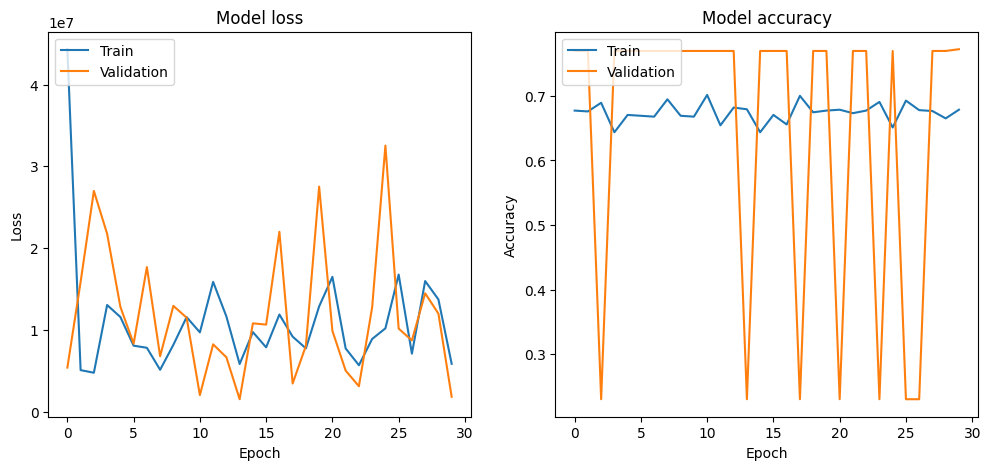

15/15 [==============================] - 1s 98ms/step - loss: 1490128.1250 - accuracy: 0.7918
Test Accuracy for Returns from day  5  : 79.18%


In [175]:
print("=============  HOT FINBERT LSTM  =============== \n")
model_LSTM_weekly(hot_finbert_top_13,5)